In [4]:
from scipy.stats import pearsonr
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stat
from scipy import stats
import seaborn as sns
import os
import csv
import glob


Overall Pearson Correlation: 0.106, P-value: 1.764e-02

Active Hits (Active > 0.25) Pearson Correlation: 0.183, P-value: 9.555e-03

Inactive Points Pearson Correlation: -0.044, P-value: 4.402e-01


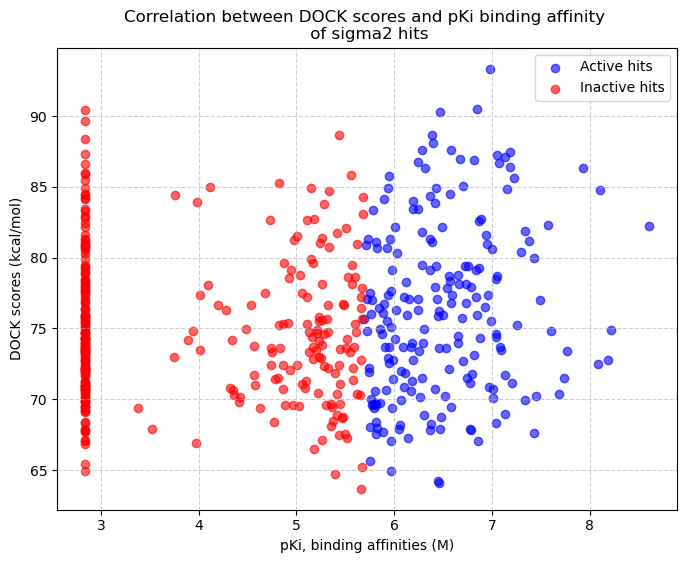

In [107]:
# Load Excel file
file_path = "/Users/JB/Rotation_bkslab/ampC_sigma_af_output/ligand_plddt.xlsx"
data = pd.read_excel(file_path)

# Extract data columns
category = data.iloc[:, 0].astype(str)  
active = data.iloc[:, 6]
y = data.iloc[:, 13]  # L-pLDDT
x = data.iloc[:, 8]  # Binding affinities

# Ensure data is numeric and drop NaN values
df = pd.DataFrame({"Ki": x, "L-pLDDT": y, "Target": category, "Active": active}).dropna()

# Standardize "Target" column for consistent filtering
df["Target"] = df["Target"].str.strip().str.lower()
df = df[df["Target"] == "sigma2"]

# Convert Active column values properly
df["Active"] = pd.to_numeric(df["Active"], errors="coerce")  # Convert to numeric
df = df.dropna(subset=["Active"])  # Drop NaNs

# Ensure Ki values are numeric and non-negative
df["Ki"] = pd.to_numeric(df["Ki"], errors="coerce")
df = df.dropna(subset=["Ki"])

# Separate data based on Active threshold
df_high_active = df[df["Active"] < 0.75]  # Active hits only
df_low_active = df[df["Active"] >= 0.75]

# Compute Pearson correlation for overall data
if len(df) >= 2:
    corr_all, p_value_all = pearsonr(df["Ki"], df["L-pLDDT"])
    print(f"\nOverall Pearson Correlation: {corr_all:.3f}, P-value: {p_value_all:.3e}")
else:
    print("\nNot enough data for overall correlation calculation.")

if len(df_high_active) >= 2:
    corr_active, p_value_active = pearsonr(df_high_active["Ki"], df_high_active["L-pLDDT"])
    print(f"\nActive Hits (Active > 0.25) Pearson Correlation: {corr_active:.3f}, P-value: {p_value_active:.3e}")
else:
    print("\nNot enough active hits for correlation calculation.")

if len(df_low_active) >= 2:
    corr_active, p_value_active = pearsonr(df_low_active["Ki"], df_low_active["L-pLDDT"])
    print(f"\nInactive Points Pearson Correlation: {corr_active:.3f}, P-value: {p_value_active:.3e}")
else:
    print("\nNot enough active points for correlation calculation.")

# Scatter plot with red and blue points
if len(df) >= 2:
    plt.figure(figsize=(8, 6))

    # Plot Blue (Active > 0.25)
    plt.scatter(df_high_active["Ki"], df_high_active["L-pLDDT"], 
                color="blue", alpha=0.6, label="Active hits")

    # Plot Red (Active ≤ 0.25)
    df_low_active = df[df["Active"] >= 0.75]  # Get remaining points
    plt.scatter(df_low_active["Ki"], df_low_active["L-pLDDT"], 
                color="red", alpha=0.6, label="Inactive hits")

    plt.title("Correlation between DOCK scores and pKi binding affinity \n of sigma2 hits")
    plt.xlabel("pKi, binding affinities (M)")
    plt.ylabel("DOCK scores (kcal/mol)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()

    plt.show()
else:
    print("\nNot enough data to generate a scatter plot.")


Overall Pearson Correlation: -0.420, P-value: 4.746e-23

Active (Blue) Points Pearson Correlation: -0.211, P-value: 2.723e-03

Inactive Points Pearson Correlation: -0.117, P-value: 4.145e-02


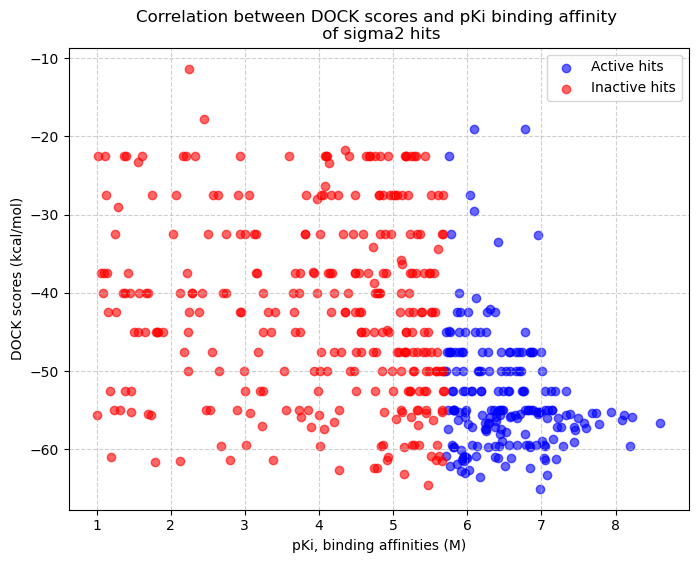

In [50]:
# Load Excel file
file_path = "/Users/JB/Rotation_bkslab/ampC_sigma/ligand_plddt.xlsx"
data = pd.read_excel(file_path)

# Extract data columns
category = data.iloc[:, 0].astype(str)  
active = data.iloc[:, 6]
y = data.iloc[:, 5]  # L-pLDDT
x = data.iloc[:, 8]   # Binding affinities (pKi)

# Ensure data is numeric and drop NaN values
df = pd.DataFrame({"Ki": x, "L-pLDDT": y, "Target": category, "Active": active}).dropna()

# Standardize "Target" column for consistent filtering
df["Target"] = df["Target"].str.strip().str.lower()
df = df[df["Target"] == "sigma2"]

# Convert Active column values properly
df["Active"] = pd.to_numeric(df["Active"], errors="coerce")  # Convert to numeric
df = df.dropna(subset=["Active"])  # Drop NaNs

# Ensure Ki values are numeric and non-negative
df["Ki"] = pd.to_numeric(df["Ki"], errors="coerce")
df = df.dropna(subset=["Ki"])

# Separate data based on Active threshold
# Blue points (considered "active hits" if Active < 0.75)
df_high_active = df[df["Active"] < 0.75]

# Red points (considered "inactive" if Active >= 0.75)
df_low_active = df[df["Active"] >= 0.75]

# 1. Compute Pearson correlation for the overall data
if len(df) >= 2:
    corr_all, p_value_all = pearsonr(df["Ki"], df["L-pLDDT"])
    print(f"\nOverall Pearson Correlation: {corr_all:.3f}, P-value: {p_value_all:.3e}")
else:
    print("\nNot enough data for overall correlation calculation.")

if len(df_high_active) >= 2:
    corr_active, p_value_active = pearsonr(df_high_active["Ki"], df_high_active["L-pLDDT"])
    print(f"\nActive (Blue) Points Pearson Correlation: {corr_active:.3f}, P-value: {p_value_active:.3e}")
else:
    print("\nNot enough active points for correlation calculation.")

if len(df_low_active) >= 2:
    corr_active, p_value_active = pearsonr(df_low_active["Ki"], df_low_active["L-pLDDT"])
    print(f"\nInactive Points Pearson Correlation: {corr_active:.3f}, P-value: {p_value_active:.3e}")
else:
    print("\nNot enough active points for correlation calculation.")

if len(df) >= 2:
    plt.figure(figsize=(8, 6))

    plt.scatter(df_high_active["Ki"], df_high_active["L-pLDDT"], 
                color="blue", alpha=0.6, label="Active hits")

    plt.scatter(df_low_active["Ki"], df_low_active["L-pLDDT"], 
                color="red", alpha=0.6, label="Inactive hits")

    #if len(df_high_active) >= 2:
        #slope_blue, intercept_blue = np.polyfit(
         #   df_high_active["Ki"], df_high_active["L-pLDDT"], 1
        #)
        #x_line_blue = np.linspace(df_high_active["Ki"].min(), df_high_active["Ki"].max(), 100)
        #y_line_blue = slope_blue * x_line_blue + intercept_blue
        #plt.plot(x_line_blue, y_line_blue, color="blue", linestyle="--", 
                 #label="Blue fit line")

    plt.title("Correlation between DOCK scores and pKi binding affinity \n of sigma2 hits")
    plt.xlabel("pKi, binding affinities (M)")
    plt.ylabel("DOCK scores (kcal/mol)")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()
    plt.show()
else:
    print("\nNot enough data to generate a scatter plot.")


Overall Pearson Correlation: 0.338, P-value: 1.560e-08


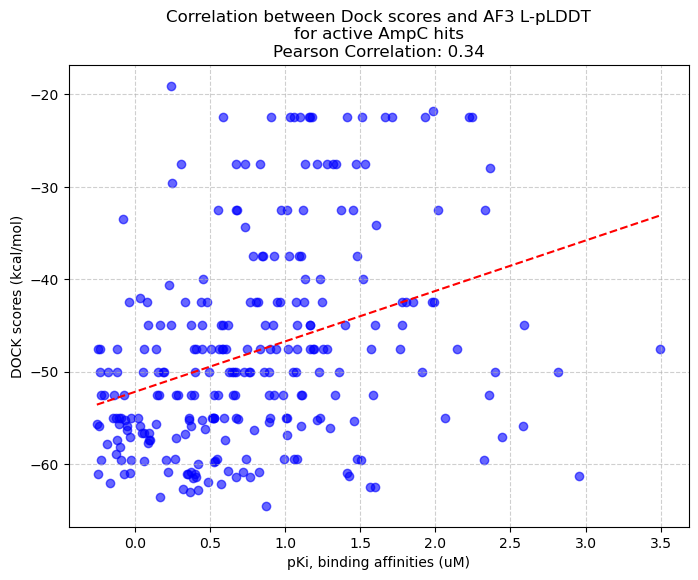

In [65]:
# Load Excel file
file_path = "/Users/JB/Rotation_bkslab/ampC_sigma_af_output/ligand_plddt.xlsx"
data = pd.read_excel(file_path)

# Extract data columns
category = data.iloc[:, 0].astype(str)  
active = data.iloc[:, 6]
y = data.iloc[:, 5]  # L-pLDDT
x = data.iloc[:, 8]  # Binding affinities

# Ensure data is numeric and drop NaN values
df = pd.DataFrame({"Ki": x, "L-pLDDT": y, "Target": category, "Active": active}).dropna()

# Standardize "Target" column for consistent filtering
df["Target"] = df["Target"].str.strip().str.lower()
df = df[df["Target"] == "sigma2"]

# Convert Active column values properly
df["Active"] = pd.to_numeric(df["Active"], errors="coerce")  # Convert to numeric
df = df.dropna(subset=["Active"])  # Drop NaNs

# Ensure Ki values are numeric and non-negative
df["Ki"] = pd.to_numeric(df["Ki"], errors="coerce")
df = df.dropna(subset=["Ki"])
df = df[df["Active"] > 0.25]

if df.empty:
    print("No data found for AmpC. Check input data.")
else:
    # Calculate correlation coefficient
    correlation_coefficient = np.corrcoef(df["Ki"], df["L-pLDDT"])[0, 1]
    corr_all, p_value_all = pearsonr(df["Ki"], df["L-pLDDT"])
    print(f"\nOverall Pearson Correlation: {corr_all:.3f}, P-value: {p_value_all:.3e}")
    
    # Create scatter plot with conditional coloring
    plt.figure(figsize=(8, 6))
    plt.scatter(df["Ki"], df["L-pLDDT"], color="blue", alpha=0.6)

    # Fit a linear trend line
    slope, intercept = np.polyfit(df["Ki"], df["L-pLDDT"], 1)  # Linear fit (degree=1)
    trend_line = np.poly1d((slope, intercept))  # Create equation for line

    # Generate x values for the trend line
    x_range = np.linspace(df["Ki"].min(), df["Ki"].max(), 100)
    plt.plot(x_range, trend_line(x_range), color="red", linestyle="--")

    # Add labels, title, and legend
    plt.title(f"Correlation between Dock scores and AF3 L-pLDDT\nfor active AmpC hits\n"
              f"Pearson Correlation: {correlation_coefficient:.2f}")
    plt.xlabel("pKi, binding affinities (uM)")
    plt.ylabel("DOCK scores (kcal/mol)")

    # Show grid and legend
    plt.grid(True, linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

-0.10509242221293688 0.018044659551486215

Pearson Correlation Coefficient for Blue (Ki < 187): -0.161, P-value: 2.268e-02
Pearson Correlation Coefficient for Red (Ki ≥ 187): -0.004, P-value: 9.496e-01
Number of blue dots (Active hits): 201
Number of red dots (Inactive hits): 305


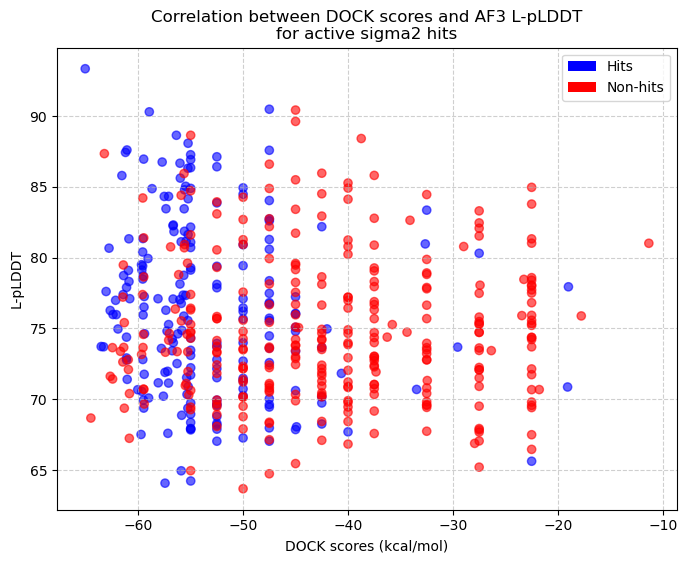

In [56]:
# Load Excel file
file_path = "/Users/JB/Rotation_bkslab/ampC_sigma/ligand_plddt.xlsx"
data = pd.read_excel(file_path)

# Extract data columns
category = data.iloc[:, 0].astype(str)  # Convert category column to string
binding = data.iloc[:, 6]  # Ki values
y = data.iloc[:, 13]  # L-pLDDT
x = data.iloc[:, 5]  # Dock scores

df = pd.DataFrame({"Dock score": x, "L-pLDDT": y, "Category": category, "Active": binding}).dropna()
df[["Dock score", "L-pLDDT", "Active"]] = df[["Dock score", "L-pLDDT", "Active"]].astype(float)

# Filter for Sigma2 category only
df = df[df["Category"].str.lower() == "sigma2"]
#df["Ki"] = df["Ki"].str.replace(">", "", regex=False).str.strip()  # Remove ">" sign

# Assign colors based on Ki values
df["Color"] = df["Active"].apply(lambda val: "blue" if val < 0.75 else "red")

corr, p = pearsonr(df["Dock score"], df["L-pLDDT"])
print(corr, p)

blue_df = df[df["Color"] == "blue"]
red_df = df[df["Color"] == "red"]
blue_corr, blue_p = np.nan, np.nan
red_corr, red_p = np.nan, np.nan

# Calculate Pearson correlation and p-value for each group
if len(blue_df) > 1:  # Ensure there are enough data points
    blue_corr, blue_p = pearsonr(blue_df["Dock score"], blue_df["L-pLDDT"])

if len(red_df) > 1:  # Ensure there are enough data points
    red_corr, red_p = pearsonr(red_df["Dock score"], red_df["L-pLDDT"])

print(f"\nPearson Correlation Coefficient for Blue (Ki < 187): {blue_corr:.3f}, P-value: {blue_p:.3e}")
print(f"Pearson Correlation Coefficient for Red (Ki ≥ 187): {red_corr:.3f}, P-value: {red_p:.3e}")
blue_count = len(blue_df)
red_count = len(red_df)
print(f"Number of blue dots (Active hits): {blue_count}")
print(f"Number of red dots (Inactive hits): {red_count}")

# Create scatter plot with conditional coloring
plt.figure(figsize=(8, 6))
plt.scatter(df["Dock score"], df["L-pLDDT"], c=df["Color"], alpha=0.6,
            label=f'Sigma2 Data')

# Add labels and title
plt.title("Correlation between DOCK scores and AF3 L-pLDDT\nfor active sigma2 hits")
plt.xlabel("DOCK scores (kcal/mol)")
plt.ylabel("L-pLDDT")

# Create legend
legend_elements = [
    Patch(facecolor='blue', label=f'Hits'),
    Patch(facecolor='red', label=f'Non-hits')
]
plt.legend(handles=legend_elements, title="")

# Show grid
plt.grid(True, linestyle="--", alpha=0.6)

# Show plot
plt.show()

Number of data points in each Dock score bin:
Dock score group
< -60         41
-60 ~ -40    343
-40 ~ -20    118
> -20          4
Name: count, dtype: int64

Statistics (Mean & Standard Deviation) for each bin:
                       mean       std
Dock score group                     
< -60             76.305585  5.630110
-60 ~ -40         75.561860  5.801589
-40 ~ -20         74.793053  4.800107
> -20             76.427816  4.264798

Pearson Correlation Coefficient: -0.105
P-value: 1.804e-02


/var/folders/6v/7hycfbhs6fg9jp_q0z6h9flm0000gp/T/ipykernel_34354/141559040.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df.groupby("Dock score group")["L-pLDDT"].agg(["mean", "std"])


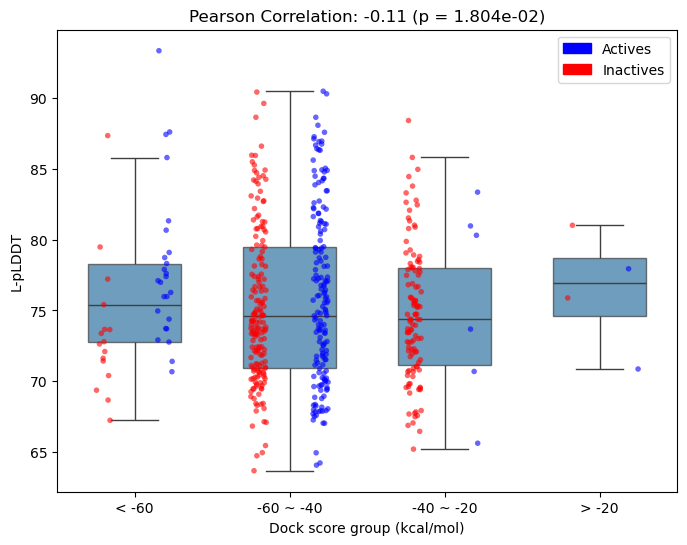

In [99]:
# Define bins and labels for Dock score
bins = [-float("inf"), -60, -40, -20, float("inf")]  
labels = ["< -60", "-60 ~ -40", "-40 ~ -20", "> -20"]

# Create DataFrame
df = pd.DataFrame({"Dock score": x, "L-pLDDT": y, "Active": active, "Category":category}).dropna()
df = df[df["Category"].str.lower() == "sigma2"]

# Convert Active column to numeric
df["Active"] = pd.to_numeric(df["Active"], errors="coerce")
df = df.dropna(subset=["Active"])  # Drop rows with NaN Active values

# Assign each Dock score value to a bin
df["Dock score group"] = pd.cut(df["Dock score"], bins=bins, labels=labels, include_lowest=True)

# Count number of data points in each bin
bin_counts = df["Dock score group"].value_counts().sort_index()

# Compute mean and standard deviation for each bin
stats = df.groupby("Dock score group")["L-pLDDT"].agg(["mean", "std"])

# Print results
print("Number of data points in each Dock score bin:")
print(bin_counts)
print("\nStatistics (Mean & Standard Deviation) for each bin:")
print(stats)

# Calculate Pearson correlation and p-value
correlation_coefficient, p_value = pearsonr(df["Dock score"], df["L-pLDDT"])

# Print correlation results
print(f"\nPearson Correlation Coefficient: {correlation_coefficient:.3f}")
print(f"P-value: {p_value:.3e}")

# Assign colors based on activity
df["Color"] = df["Active"].apply(lambda val: "blue" if val < 0.75 else "red")

# Create the box plot
plt.figure(figsize=(8, 6))

# Boxplot
sns.boxplot(x="Dock score group", y="L-pLDDT", data=df, showfliers=False, width=0.6, boxprops=dict(alpha=0.7))

# Overlay strip plot with colored points based on activity
sns.stripplot(x="Dock score group", y="L-pLDDT", data=df, jitter=True, size=4, alpha=0.6, 
              palette={"blue": "blue", "red": "red"}, hue=df["Color"], dodge=True)

# Add labels and title
plt.xlabel("Dock score group (kcal/mol)")
plt.ylabel("L-pLDDT")
plt.title(f"Pearson Correlation: {correlation_coefficient:.2f} (p = {p_value:.3e})")

# Create custom legend
legend_patches = [
    mpatches.Patch(color="blue", label="Actives"),
    mpatches.Patch(color="red", label="Inactives")
]
plt.legend(handles=legend_patches, loc="upper right", title="")

# Show plot
plt.show()

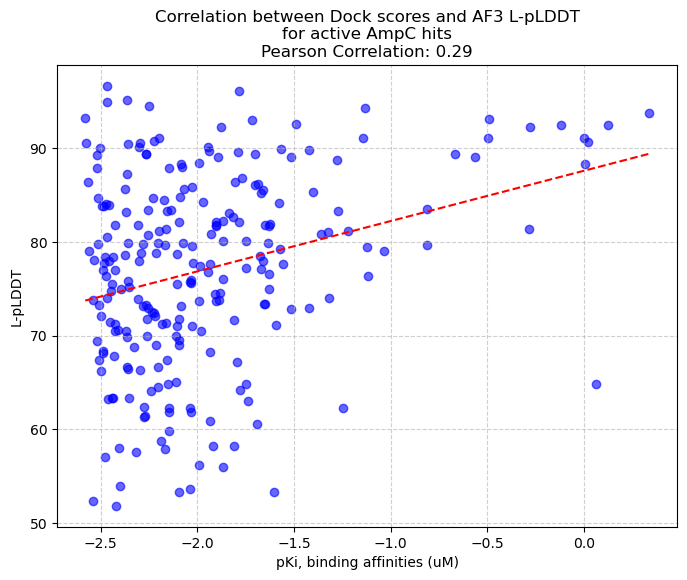


Pearson Correlation Coefficient: 0.293
P-value: 3.751e-06


In [68]:
# Load Excel file
file_path = "/Users/JB/Rotation_bkslab/ampC_sigma_af_output/ligand_plddt.xlsx"
data = pd.read_excel(file_path)

# Extract data columns
category = data.iloc[:, 0].astype(str)  
active = data.iloc[:, 6]
y = data.iloc[:, 12]  # L-pLDDT
x = data.iloc[:, 8]  # Binding affinities

# Ensure data is numeric and drop NaN values
df = pd.DataFrame({"Ki": x, "L-pLDDT": y, "Target": category, "Active": active}).dropna()

# Standardize "Target" column for consistent filtering
df["Target"] = df["Target"].str.strip().str.lower()
df = df[df["Target"] == "ampc"]

# Convert Active column values properly
df["Active"] = pd.to_numeric(df["Active"], errors="coerce")  # Convert to numeric
df = df.dropna(subset=["Active"])  # Drop NaNs

# Ensure Ki values are numeric and non-negative
df["Ki"] = pd.to_numeric(df["Ki"], errors="coerce")
df = df.dropna(subset=["Ki"])
df = df[df["Active"] > 0.25]

if df.empty:
    print("No data found for AmpC. Check input data.")
else:
    # Calculate correlation coefficient
    correlation_coefficient = np.corrcoef(df["Ki"], df["L-pLDDT"])[0, 1]

    # Create scatter plot with conditional coloring
    plt.figure(figsize=(8, 6))
    plt.scatter(df["Ki"], df["L-pLDDT"], color="blue", alpha=0.6)

    # Fit a linear trend line
    slope, intercept = np.polyfit(df["Ki"], df["L-pLDDT"], 1)  # Linear fit (degree=1)
    trend_line = np.poly1d((slope, intercept))  # Create equation for line

    # Generate x values for the trend line
    x_range = np.linspace(df["Ki"].min(), df["Ki"].max(), 100)
    plt.plot(x_range, trend_line(x_range), color="red", linestyle="--")

    # Add labels, title, and legend
    plt.title(f"Correlation between Dock scores and AF3 L-pLDDT\nfor active AmpC hits\n"
              f"Pearson Correlation: {correlation_coefficient:.2f}")
    plt.xlabel("pKi, binding affinities (uM)")
    plt.ylabel("L-pLDDT")

    # Show grid and legend
    plt.grid(True, linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

# Calculate Pearson correlation and p-value
correlation_coefficient, p_value = pearsonr(df["Ki"], df["L-pLDDT"])

# Print correlation results
print(f"\nPearson Correlation Coefficient: {correlation_coefficient:.3f}")
print(f"P-value: {p_value:.3e}")

In [4]:
# Load data
file_path = "/Users/JB/Rotation_bkslab/ampC_sigma_af_output/ligand_plddt.xlsx"
data = pd.read_excel(file_path)

# Extract data columns
category = data.iloc[:, 0].astype(str)  
active = data.iloc[:, 6]
y = data.iloc[:, 12]  # L-pLDDT
x = data.iloc[:, 8]  # Binding affinities (Ki)

# Create a DataFrame and drop NaN values
df = pd.DataFrame({"Ki": x, "L-pLDDT": y, "Target": category, "Active": active}).dropna()

# Convert Active column to numeric and drop NaNs
df["Active"] = pd.to_numeric(df["Active"], errors="coerce")  
df = df.dropna(subset=["Active"])  

# Convert Ki values to numeric, remove non-numeric values, and filter non-negative values
df["Ki"] = pd.to_numeric(df["Ki"], errors="coerce")
df = df.dropna(subset=["Ki"])  # Drop rows where Ki is NaN after conversion
df = df[df["Ki"] >= 0]  # Ensure Ki is non-negative
df = df[df["Target"] == "Mac1"

# Ensure there's data to analyze
if df.empty:
    print("No valid numerical data found for Ki. Check input data.")
else:
    # Calculate correlation coefficient
    correlation_coefficient = np.corrcoef(df["Ki"], df["L-pLDDT"])[0, 1]

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df["Ki"], df["L-pLDDT"], color="blue", alpha=0.6, label="Data Points")

    # Fit a linear trend line
    slope, intercept = np.polyfit(df["Ki"], df["L-pLDDT"], 1)
    trend_line = np.poly1d((slope, intercept))

    # Generate x values for the trend line
    x_range = np.linspace(df["Ki"].min(), df["Ki"].max(), 100)
    plt.plot(x_range, trend_line(x_range), color="red", linestyle="--", label="Trend Line")

    # Add labels and title
    plt.title(f"Correlation between Dock Scores and AF3 L-pLDDT\nfor Active AmpC Hits\n"
              f"Pearson Correlation: {correlation_coefficient:.2f}")
    plt.xlabel("pKi Binding Affinity (in µM)")
    plt.ylabel("L-pLDDT")

    # Show grid and legend
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend()

    # Show plot
    plt.show()

    # Calculate Pearson correlation and p-value
    correlation_coefficient, p_value = pearsonr(df["Ki"], df["L-pLDDT"])

    # Print correlation results
    print(f"\nPearson Correlation Coefficient: {correlation_coefficient:.3f}")
    print(f"P-value: {p_value:.3e}")

SyntaxError: unterminated string literal (detected at line 22) (1194914226.py, line 22)


Pearson Correlation Coefficient: -0.327, P-value: 6.765e-15


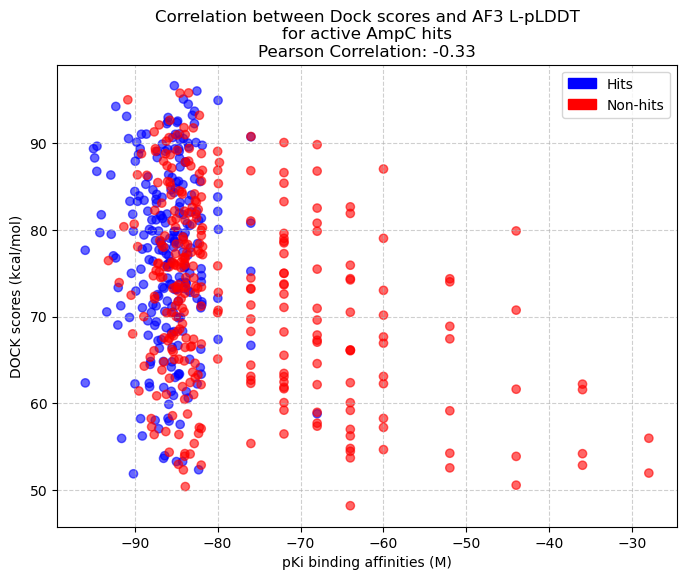

In [49]:
file_path = "/Users/JB/Rotation_bkslab/ampC_sigma/ligand_plddt.xlsx"
data = pd.read_excel(file_path)

# Extract data columns
category = data.iloc[:, 0].astype(str)  
active = data.iloc[:, 9].astype(str)  
y = data.iloc[:, 13]  # L-pLDDT
x = data.iloc[:, 5]   # Dock scores
ki = data.iloc[:, 9].astype(str)  # Ki binding affinities (ensure it's string for processing)

# Ensure data is numeric and drop NaN values
df = pd.DataFrame({"Dock score": x, "L-pLDDT": y, "Target": category, "Active": active, "Ki": ki}).dropna()
df[["Dock score", "L-pLDDT"]] = df[["Dock score", "L-pLDDT"]].astype(float)  # Convert to float

# 🔹 Clean "Ki" Column: Remove ">" and Convert to Float
df["Ki"] = df["Ki"].str.replace(">", "", regex=False).str.strip()  # Remove ">" sign
df["Ki"] = pd.to_numeric(df["Ki"], errors="coerce")  # Convert cleaned values to float, NaN if invalid

df = df[df["Target"].str.lower().isin(["ampc", "ampc non-hits"])]
df = df[df["Active"] != "#N/A"]
df["Color"] = df["Target"].apply(lambda val: "red" if val.lower() == "ampc non-hits" else "blue")

# Compute Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(df["Dock score"], df["L-pLDDT"])

# Print correlation results
print(f"\nPearson Correlation Coefficient: {corr_coeff:.3f}, P-value: {p_value:.3e}")

# Check if DataFrame is empty after filtering
if df.empty:
    print("No data found for AmpC. Check input data.")
else:
    # Calculate correlation coefficient
    correlation_coefficient = np.corrcoef(df["Dock score"], df["L-pLDDT"])[0, 1]

    # Create scatter plot with color based on Ki
    plt.figure(figsize=(8, 6))
    plt.scatter(df["Dock score"], df["L-pLDDT"], c=df["Color"], alpha=0.6, label="Data Points")

    # Add labels and title
    plt.title(f"Correlation between Dock scores and AF3 L-pLDDT\nfor active AmpC hits\n"
              f"Pearson Correlation: {correlation_coefficient:.2f}")
    plt.xlabel("pKi binding affinities (M)")
    plt.ylabel("DOCK scores (kcal/mol)")

    # Add legend
    from matplotlib.patches import Patch
    legend_patches = [
        Patch(color="blue", label="Hits"),
        Patch(color="red", label="Non-hits")
    ]
    plt.legend(handles=legend_patches, loc="upper right", title="")

    # Show grid
    plt.grid(True, linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

In [ ]:
# Load Excel file
file_path = "/Users/JB/Rotation_bkslab/ampC_sigma_af_output/ligand_plddt.xlsx"
data = pd.read_excel(file_path)

# Extract data columns
category = data.iloc[:, 0].astype(str)  
active = data.iloc[:, 6]
y = data.iloc[:, 12]  # L-pLDDT
x = data.iloc[:, 8]  # Binding affinities

# Ensure data is numeric and drop NaN values
df = pd.DataFrame({"Ki": x, "L-pLDDT": y, "Target": category, "Active": active}).dropna()

# Standardize "Target" column for consistent filtering
df["Target"] = df["Target"].str.strip().str.lower()
df = df[df["Target"] == "mac1"]

# Ensure Ki values are numeric and non-negative
df["Ki"] = pd.to_numeric(df["Ki"], errors="coerce")
df = df.dropna(subset=["Ki"])
df = df[df["Active"] > 0.25]

if df.empty:
    print("No data found for AmpC. Check input data.")
else:
    # Calculate correlation coefficient
    correlation_coefficient = np.corrcoef(df["Ki"], df["L-pLDDT"])[0, 1]

    # Create scatter plot with conditional coloring
    plt.figure(figsize=(8, 6))
    plt.scatter(df["Ki"], df["L-pLDDT"], color="blue", alpha=0.6)

    # Fit a linear trend line
    slope, intercept = np.polyfit(df["Ki"], df["L-pLDDT"], 1)  # Linear fit (degree=1)
    trend_line = np.poly1d((slope, intercept))  # Create equation for line

    # Generate x values for the trend line
    x_range = np.linspace(df["Ki"].min(), df["Ki"].max(), 100)
    plt.plot(x_range, trend_line(x_range), color="red", linestyle="--")

    # Add labels, title, and legend
    plt.title(f"Correlation between Dock scores and AF3 L-pLDDT\nfor active AmpC hits\n"
              f"Pearson Correlation: {correlation_coefficient:.2f}")
    plt.xlabel("pKi, binding affinities (uM)")
    plt.ylabel("L-pLDDT")

    # Show grid and legend
    plt.grid(True, linestyle="--", alpha=0.6)

    # Show plot
    plt.show()

# Calculate Pearson correlation and p-value
correlation_coefficient, p_value = pearsonr(df["Ki"], df["L-pLDDT"])

# Print correlation results
print(f"\nPearson Correlation Coefficient: {correlation_coefficient:.3f}")
print(f"P-value: {p_value:.3e}")

       Metric  T-Statistic       P-Value
0  Dock Score   -12.941583  2.812873e-33
1     L-pLDDT     2.650756  8.373290e-03


/var/folders/6v/7hycfbhs6fg9jp_q0z6h9flm0000gp/T/ipykernel_43081/471094790.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Dock score", data=df, ax=axes[0], palette=colors)
/var/folders/6v/7hycfbhs6fg9jp_q0z6h9flm0000gp/T/ipykernel_43081/471094790.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="L-pLDDT", data=df, ax=axes[1], palette=colors)


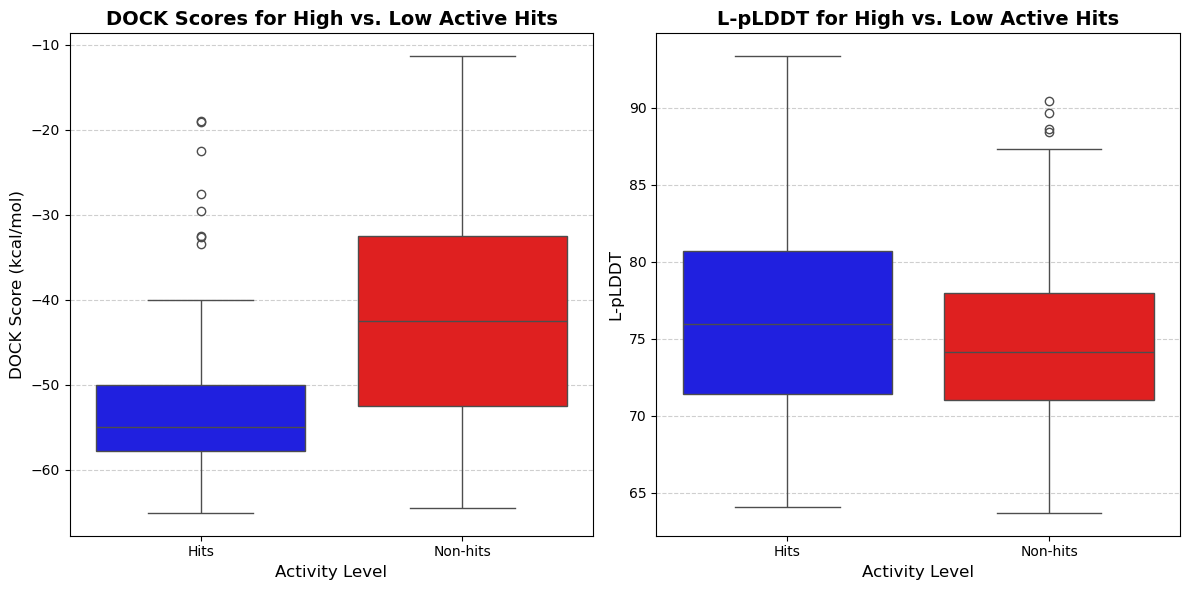

In [10]:
file_path = "/Users/JB/Rotation_bkslab/ampC_sigma/ligand_plddt.xlsx"
df = pd.read_excel(file_path)

# 🔹 Extract relevant columns
df["Target"] = df.iloc[:, 0].astype(str)  # First column for "Target" (AmpC or iAmpC)
df["Dock score"] = df.iloc[:, 5]  # Assuming DOCK score is in column 6 (index 5)
df["L-pLDDT"] = df.iloc[:, 13]  # Assuming L-pLDDT is in column 14 (index 13)
df["Active"] = df.iloc[:, 6]  # Activity column

# Filter for "Sigma2"
df = df[df["Target"].str.lower() == "sigma2"]
# Filter for "ampc"
#df = df[df["Target"].str.lower().isin(["ampc", "iampc"])]

#Convert "Active" to numeric
df["Active"] = pd.to_numeric(df["Active"], errors="coerce")

#Create a category column: High Active (<0.75) vs. Low Active (≥0.75)
df["Category"] = df["Active"].apply(lambda x: "Hits" if x < 0.75 else "Non-hits")

#Convert "Dock score" and "L-pLDDT" to float
df[["Dock score", "L-pLDDT"]] = df[["Dock score", "L-pLDDT"]].apply(pd.to_numeric, errors="coerce")

#Define color mapping
colors = {"Non-hits": "red", "Hits": "blue"}
#colors = {"AmpC": "blue", "iAmpC": "red"}

# Separate the data into two groups based on "Category"
dock_hits = df[df["Category"] == "Hits"]["Dock score"].dropna()
dock_non_hits = df[df["Category"] == "Non-hits"]["Dock score"].dropna()

lpddt_hits = df[df["Category"] == "Hits"]["L-pLDDT"].dropna()
lpddt_non_hits = df[df["Category"] == "Non-hits"]["L-pLDDT"].dropna()

# Perform unpaired (independent) t-tests
t_stat_dock, p_value_dock = stats.ttest_ind(dock_hits, dock_non_hits, equal_var=False)
t_stat_lpddt, p_value_lpddt = stats.ttest_ind(lpddt_hits, lpddt_non_hits, equal_var=False)
t_test_results = pd.DataFrame({
    "Metric": ["Dock Score", "L-pLDDT"],
    "T-Statistic": [t_stat_dock, t_stat_lpddt],
    "P-Value": [p_value_dock, p_value_lpddt]
})

print(t_test_results)


df["Category"] = pd.Categorical(df["Category"], categories=["Hits", "Non-hits"], ordered=True)

# 🔹 Create two side-by-side box plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 🔹 Box plot for DOCK Scores
sns.boxplot(x="Category", y="Dock score", data=df, ax=axes[0], palette=colors)
axes[0].set_title("DOCK Scores for High vs. Low Active Hits", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Activity Level", fontsize=12)
axes[0].set_ylabel("DOCK Score (kcal/mol)", fontsize=12)
axes[0].grid(axis="y", linestyle="--", alpha=0.6)

# 🔹 Box plot for L-pLDDT
sns.boxplot(x="Category", y="L-pLDDT", data=df, ax=axes[1], palette=colors)
axes[1].set_title("L-pLDDT for High vs. Low Active Hits", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Activity Level", fontsize=12)
axes[1].set_ylabel("L-pLDDT", fontsize=12)
axes[1].grid(axis="y", linestyle="--", alpha=0.6)

# 🔹 Adjust layout and show plot
plt.tight_layout()
plt.show()